In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline
plt.style.use('fivethirtyeight')

df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv', parse_dates=['Date'])
df['Total Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)
df.head()

,Date,Country,Confirmed,Recovered,Deaths,Total Cases
0,2020-01-22,Afghanistan,0,0,0,0
1,2020-01-23,Afghanistan,0,0,0,0
2,2020-01-24,Afghanistan,0,0,0,0
3,2020-01-25,Afghanistan,0,0,0,0
4,2020-01-26,Afghanistan,0,0,0,0


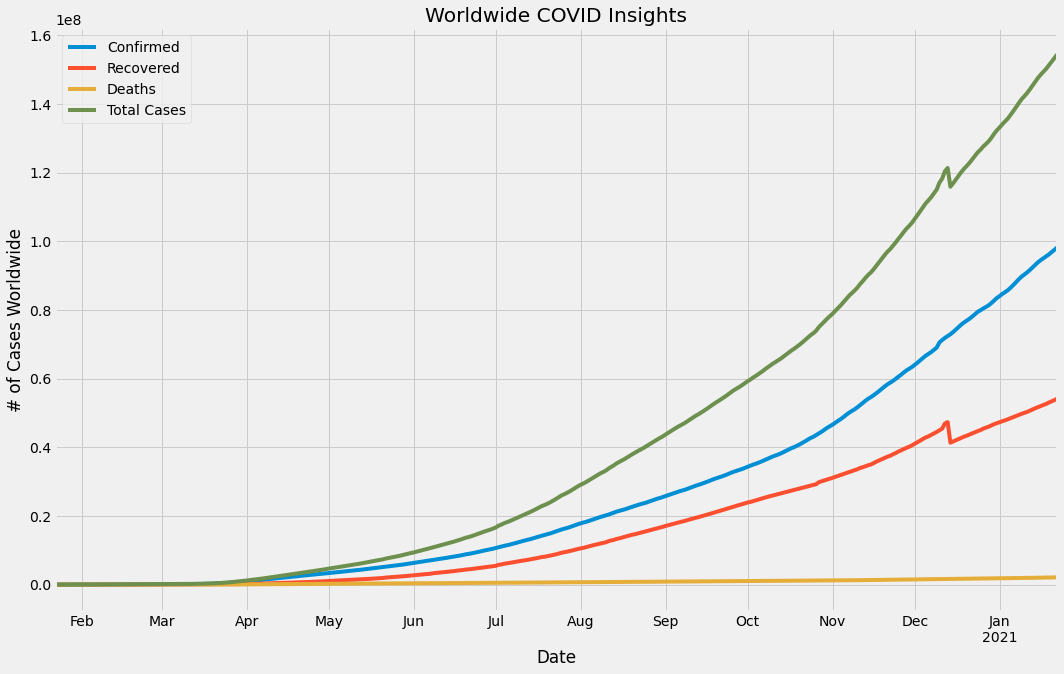

In [7]:
#Worlwide cases

worldwide_df = df.groupby(['Date']).sum()
w = worldwide_df.plot(figsize=(16,10))
w.set_xlabel('Date')
w.set_ylabel('# of Cases Worldwide')
w.title.set_text('Worldwide COVID Insights')

plt.show()

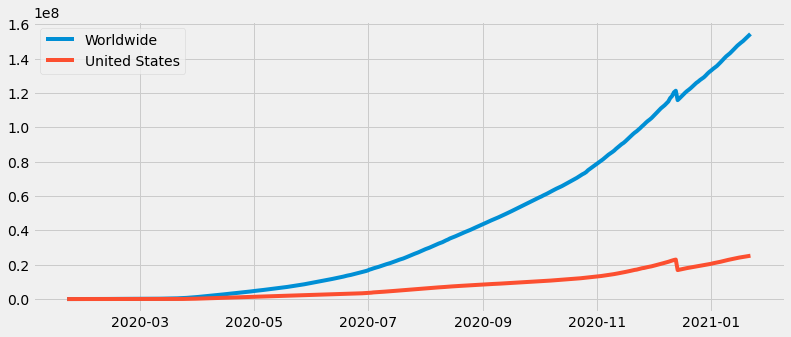

In [9]:
us_df = df[df['Country'] == 'US'].groupby(['Date']).sum()
fig = plt.figure(figsize = (12,5))
ax = fig.add_subplot(111)

ax.plot(worldwide_df[['Total Cases']], label = 'Worldwide')
ax.plot(us_df[['Total Cases']], label = 'United States')

w.set_xlabel('Date')
w.set_ylabel('# of Total Cases')
w.title.set_text('Worldwide vs United States Cases')

plt.legend(loc = 'upper left')

plt.show()


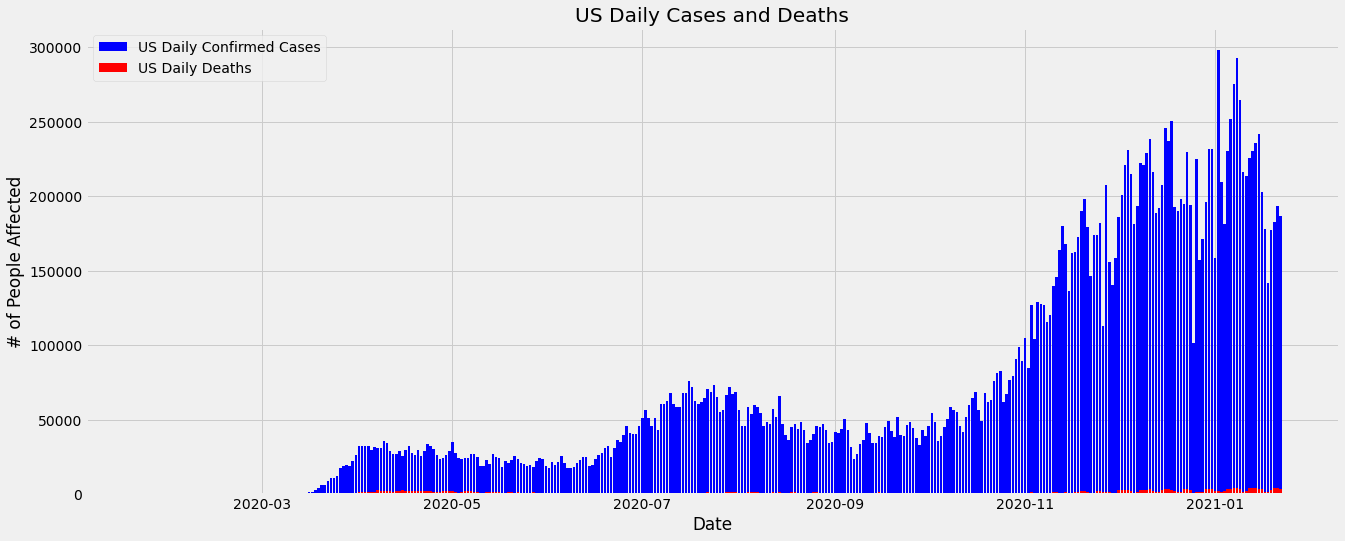

In [17]:
#United States Daily Cases and Deaths
us_df['Daily Confirmed'] = us_df['Confirmed'].sub(us_df['Confirmed'].shift())
us_df['Daily Deaths'] = us_df['Deaths'].sub(us_df['Deaths'].shift())

fig = plt.figure(figsize = (20, 8))
ax = fig.add_subplot(111)

ax.bar(us_df['Date'], us_df['Daily Confirmed'], color = 'b', label = 'US Daily Confirmed Cases')
ax.bar(us_df['Date'], us_df['Daily Deaths'], color = 'r', label = 'US Daily Deaths')
ax.set_xlabel('Date')
ax.set_ylabel('# of People Affected')
ax.title.set_text('US Daily Cases and Deaths')
plt.legend(loc = 'upper left')
plt.show()
